In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

In [125]:
df= pd.read_csv('forestfires.csv')

In [126]:
def condition(row):
    if row['area'] >=0 and row['area']<2 :
        return 0
    elif row['area'] >=2 and row['area']<10 :
        return 1
    else:
        return 2

In [127]:
df['category'] =df.apply(condition, axis=1)
#df.to_csv('new_forestfire.csv',index=False)


In [128]:
#ndf=pd.read_csv('new_forestfire.csv')


In [129]:
def month_cat(month):
    if month == 'oct' or month == 'sep' :
        return 0
    elif month =='nov' or month == 'may':
        return 1
    elif month == 'mar' or month == 'jun':
        return 2
    elif month == 'jul' or month == 'jan':
        return 3
    elif month == 'feb' or month == 'dec':
        return 4
    else : 
        return 5


In [130]:
df['month_new'] = df['month'].apply(month_cat)

In [131]:
x= df[['temp','RH','wind','rain','month_new']]
y= df[['category']]

In [132]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=1)


In [133]:
seed=7

In [134]:
#lin_reg=LinearRegression()
#tree_reg = DecisionTreeRegressor()
#svr=svm.SVR()
#knn = neighbors.KNeighborsRegressor()
#rf =ensemble.RandomForestRegressor(n_estimators=500)


In [137]:
def svm():
    classifier=SVC(kernel="linear")
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print("\nSupport Vector Machine\nAccuracy Score: "+score)
    plt.scatter(y_test,y_pred)
    plt.xlabel('True Values ')
    plt.ylabel('Predictions ')
    plt.show()
    

In [138]:
def random():
    model = RandomForestClassifier(n_estimators=50)
    model1= BaggingClassifier(base_estimator=model, n_estimators=70, random_state=101)
    results_model = model1.fit(x_train,y_train)
    y_pred1= results_model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print("\nRandom Forest\nAccuracy Score: "+score)
    plt.scatter(y_test,y_pred1)
    plt.xlabel('True Values ')
    plt.ylabel('Predictions ')
    plt.show()

In [139]:
def kmean():
    km = KMeans(n_clusters=3)
    km.fit(x_train,y_train)
    y_pred= km.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print("\nK_Means\nAccuracy Score: "+score)
    plt.scatter(y_test,y_pred)
    plt.xlabel('True Values ')
    plt.ylabel('Predictions ')
    plt.show()

In [140]:
def Linear():
    line= LinearRegression()
    line.fit(x_train,y_train)
    y_pred= line.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print("\nLinear REgression\nAccuracy Score: "+score)
    plt.scatter(y_test,y_pred)
    plt.xlabel('True Values ')
    plt.ylabel('Predictions ')
    plt.show()

In [143]:
models=[Linear,kmean,random,svm]

In [144]:
# evaluate each model in turn
#name[]
m=0
for model in models:
    print("\n")
    models[m]()
    print('\n')
    m=m+1
    
    
    

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

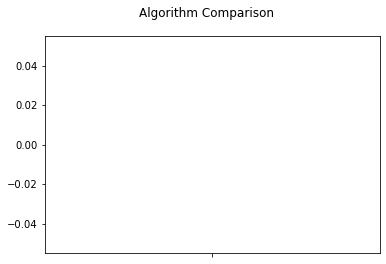

In [122]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [42]:
list=[lin_reg, tree_reg,svr,knn,rf]
m=1
for i in list:
    method(x,i,m)
    m+=1

Linear Regression
-0.009320365770656869
Linear Regression MSE:  0.6787530152061252
Linear Regression RMSE:  0.8238646825821127
Decision Tree
-0.7783888155643544
Decision Tree MSE:  1.195940170940171
Decision Tree RMSE:  1.0935904950849613
SVM Regression
-0.42756875869654287
SVM Regression MSE:  0.9600188723423794
SVM Regression RMSE:  0.9798055278178315
KNeighborsRegressor
-0.1996832380114384
KNeighborsRegressor MSE:  0.8067692307692307
KNeighborsRegressor RMSE:  0.898203334868687


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-40-d0ac5a75ed2a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


Random Forest Tree
-0.056963202693527615
Random Forest Tree MSE:  0.7107921182610617
Random Forest Tree RMSE:  0.8430848820024361
